<a href="https://colab.research.google.com/github/Sumanth-Mahabaleshwar-Bhat/SpecialTopicsML-Winter2022/blob/main/Sumanth_Mahabaleshwar_Bhat_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing data_banknote_authentication text file and splitting the dataset into Training, Validation and Test Set
np.random.seed(4003)
filepath = "C:\\Users\\MY PC\\Downloads\\data_banknote_authentication.txt"
data_banknote_authentication = np.genfromtxt(filepath, delimiter=',')
np.random.shuffle(data_banknote_authentication)
data_banknote_authentication = data_banknote_authentication.T
train_split = data_banknote_authentication[:, :823]
validation_split = data_banknote_authentication[:, 823:1097]
test_split = data_banknote_authentication[:, 1097:1372]

In [ ]:
# Function to split dataset into features and target labels
def split_dataset(split):
    Y = split[-1]
    X = np.delete(split, (4), axis=0)
    return (X, Y)

In [ ]:
X_train, Y_train = split_dataset(train_split)
X_val, Y_val = split_dataset(validation_split)
X_test, Y_test = split_dataset(test_split)

In [ ]:
# Feature Standardization of Training, Validation and Test Sets
X_train = X_train.T
X_test = X_test.T
X_val = X_val.T
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)
X_train = X_train.T
X_test = X_test.T
X_val = X_val.T

In [ ]:
# Function to initialize Weights and Biases to the Neural Network
def weights_biases_initialization(layers):
    L = len(layers)
    weights = [np.random.randn(layers[l], layers[l-1]) * np.sqrt(2 / layers[l-1]) for l in range(1, L)]
    biases = [np.zeros((layers[l], 1)) for l in range(1, L)]
    return weights, biases

In [ ]:
# Function to define the sigmoid activation function at the output
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Function to define the ReLU activation function at the hidden units
def relu(x):
    return np.maximum(0, x)

In [ ]:
# Function to obtain ReLU derivate for the Back propagation
def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [ ]:
# Function to define Average Cross-entropy loss on the Training set
def average_cross_entropy(Y, A, n):
    cross_entropy = -(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return 1/n * np.sum(cross_entropy)

In [ ]:
# Function to compute the Final value of the node in the hidden layer
def feed_forward(w, X, b, activation_fn):
    Z = np.dot(w, X) + b
    A = activation_fn(Z)
    return (A, Z)

In [ ]:
# Function to compute the Final value of the nodes in the hidden layer for multiple layers
def forward_propagate(W, X, b):
    A1, Z1 = feed_forward(W[0], X, b[0], relu)
    A2, Z2 = feed_forward(W[1], A1, b[1], sigmoid)
    return (A1, A2, Z1, Z2)

In [ ]:
# Function to compute the Back propagation in Neural Network
def backpropagate_2nd_layer(A1, A2, Y, n):
    dL_dZ2 = A2 - Y
    dL_dW2 = 1/n * np.dot(dL_dZ2, A1.T)
    dL_dB2 = 1/n * dL_dZ2.sum(axis=1, keepdims=True)
    return (dL_dZ2, dL_dW2, dL_dB2)

def backpropagate_1st_layer(W, X, dL_dZ2, Z1, n):
    dL_dZ1 = np.dot(dL_dZ2.T, W[1]) * relu_derivative(Z1).T
    dL_dW1 = 1/n * np.dot(dL_dZ1.T, X.T)
    dL_dB1 = 1/n * dL_dZ1.sum(axis=0, keepdims=True).T
    return (dL_dW1, dL_dB1)

In [ ]:
# Function to update weights and biases after each epoch through all the training examples
def update_weights_biases(alpha, gradients, W, b):
    dL_dW1, dL_dW2, dL_dB1, dL_dB2 = gradients
    W[0] -= alpha * dL_dW1
    W[1] -= alpha * dL_dW2
    b[0] -= alpha * dL_dB1
    b[1] -= alpha * dL_dB2

In [ ]:
def binarize(x):
    return (x > 0.5).astype(np.float_)

In [ ]:
# Function to compute accuracy of Training, Validation and Test sets
def calculate_accuracy(A, Y):
    A = binarize(A)
    return (np.equal(A, Y).sum() / Y.shape[0]) * 100

In [ ]:
# Function to evaluate the performance of Training, Validation and Test sets and compute number of misclassifications for one hidden layer
def evaluate_performance_one_hidden_layer(A, Y, dataset):
    misclassification = []
    accuracy = calculate_accuracy(A, Y)
    A = binarize(A)
    result = np.equal(A, Y)
    misclassification = A[np.where(result == False)]
    print(f'{dataset} accuracy: {accuracy}')
    print('Number of ', dataset, 'misclassifications : ', len(misclassification))
    return len(misclassification)

In [ ]:
# Function to evaluate the performance of Training, Validation and Test sets and compute number of misclassifications for two hidden layers
def evaluate_performance_two_hiddenLayers(A, Y, dataset, k2):
    misclassification = []
    accuracy = calculate_accuracy(A, Y) / k2
    A = binarize(A)
    result = np.equal(A, Y)
    misclassification = A[np.where(result == False)]
    print(f'{dataset} accuracy: {accuracy}')
    print('Number of ', dataset, 'misclassifications : ', len(misclassification))
    return len(misclassification)

In [ ]:
# Initialization of variables and constants
alpha = 0.005
epochs = 1000
training_loss = []
validation_loss = []
test_loss = []
training_accuracy = []
validation_accuracy = []
test_accuracy = []
train_A2 = []
validation_A2 = []
test_A2 = []
training_misclassification = []
validation_misclassification = []
test_misclassification = []
training_misclassification_twoLayers = []
validation_misclassification_twoLayers = []
test_misclassification_twoLayers = []

In [ ]:
# Function to train the Neural network based on the number of hidden layers
def training_neural_networks(hidden_layers, n2):
    for i in range(epochs + 1):
        train_A1, train_A2, train_Z1, _ = forward_propagate(weights, X_train, biases)
        _, validation_A2, _, _ = forward_propagate(weights, X_val, biases)
        _, test_A2, _, _ = forward_propagate(weights, X_test, biases)

        if i % 100 == 0:
            training_loss.append(average_cross_entropy(Y_train, train_A2, len(Y_train)))
            validation_loss.append(average_cross_entropy(Y_val, validation_A2, len(Y_val)))
            test_loss.append(average_cross_entropy(Y_test, test_A2, len(Y_test)))
            training_accuracy.append(calculate_accuracy(train_A2, Y_train))
            validation_accuracy.append(calculate_accuracy(validation_A2, Y_val))
            test_accuracy.append(calculate_accuracy(test_A2, Y_test))

        dL_dZ2, dL_dW2, dL_dB2 = backpropagate_2nd_layer(train_A1, train_A2, Y_train, len(Y_train))
        dL_dW1, dL_dB1 = backpropagate_1st_layer(weights, X_train, dL_dZ2, train_Z1, len(Y_train))

        gradients = (dL_dW1, dL_dW2, dL_dB1, dL_dB2)
        update_weights_biases(alpha, gradients, weights, biases)

    if hidden_layers == 1:
        training_misclassification.append(evaluate_performance_one_hidden_layer(train_A2, Y_train, 'Training'))
        validation_misclassification.append(evaluate_performance_one_hidden_layer(validation_A2, Y_val, 'Validation'))
        test_misclassification.append(evaluate_performance_one_hidden_layer(test_A2, Y_test, 'Test'))
        return (training_misclassification, validation_misclassification, test_misclassification)
    elif hidden_layers == 2:
        training_misclassification_twoLayers.append(evaluate_performance_two_hiddenLayers(train_A2, Y_train, 'Training', n2))
        validation_misclassification_twoLayers.append(evaluate_performance_two_hiddenLayers(validation_A2, Y_val, 'Validation', n2))
        test_misclassification_twoLayers.append(evaluate_performance_two_hiddenLayers(test_A2, Y_test, 'Test', n2))
        return (training_misclassification_twoLayers, validation_misclassification_twoLayers, test_misclassification_twoLayers)

In [ ]:
# Training a single hidden layer Neural network with combination of n1 values ranging from 1 to 10
training_misclassification = []
validation_misclassification = []
test_misclassification = []
for n1 in range(1, 11):
    weights, biases = weights_biases_initialization([4, n1, 1])
    print('n1 = ', n1)
    training_misclassification, validation_misclassification, test_misclassification = training_neural_networks(1, n1)

n1 =  1
Training accuracy: 66.9501822600243
Number of  Training misclassifications :  272
Validation accuracy: 70.43795620437956
Number of  Validation misclassifications :  81
Test accuracy: 66.54545454545455
Number of  Test misclassifications :  92
n1 =  2
Training accuracy: 65.73511543134872
Number of  Training misclassifications :  282
Validation accuracy: 67.51824817518248
Number of  Validation misclassifications :  89
Test accuracy: 64.0
Number of  Test misclassifications :  99
n1 =  3
Training accuracy: 80.4374240583232
Number of  Training misclassifications :  161
Validation accuracy: 82.11678832116789
Number of  Validation misclassifications :  49
Test accuracy: 76.36363636363637
Number of  Test misclassifications :  65
n1 =  4
Training accuracy: 98.5419198055893
Number of  Training misclassifications :  12
Validation accuracy: 98.54014598540147
Number of  Validation misclassifications :  4
Test accuracy: 96.36363636363636
Number of  Test misclassifications :  10
n1 =  5
Traini

In [ ]:
# Function to compute number of misclassification error of Training, Validation and Test set for one hidden layer
def minimum_Misclassification_error(dataset, dataset_type):
    min = dataset[0]
    for i in range(0, len(dataset)):
        if dataset[i] <= min:
            min = dataset[i]
            index = i+1
    print('The lowest ', dataset_type ,' misclassification error is ', min)
    print(' at n1 = ', index)

In [ ]:
minimum_Misclassification_error(training_misclassification, 'Training')
minimum_Misclassification_error(validation_misclassification, 'Validation')
minimum_Misclassification_error(test_misclassification, 'Testing')

The lowest  Training  misclassification error is  12
 at n1 =  4
The lowest  Validation  misclassification error is  4
 at n1 =  4
The lowest  Testing  misclassification error is  10
 at n1 =  4


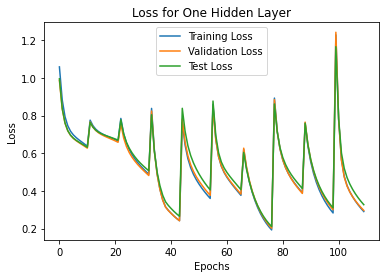

In [ ]:
plt.figure()
plt.title('Loss for One Hidden Layer')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()

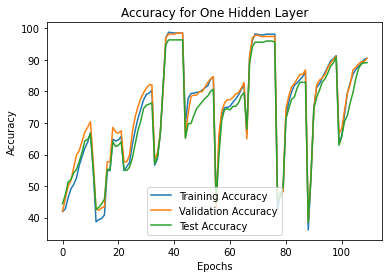

In [ ]:
plt.figure()
plt.title('Accuracy for One Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()

In [ ]:
#Training two hidden layers Neural network with combination of n1 and n2 values with n1 ranging from 1 to 5 and n2 from 1 to 5 so that n1 + n2 <= 10
training_misclassification_twoLayers = []
validation_misclassification_twoLayers = []
test_misclassification_twoLayers = []
for n1 in range(1,6):
    for n2 in range(5,0,-1):
        weights, biases = weights_biases_initialization([4, n1, n2, 1])
        print('(n1, n2) = ', (n1, n2))
        training_misclassification_twoLayers, validation_misclassification_twoLayers, test_misclassification_twoLayers = training_neural_networks(2, n2)

(n1, n2) =  (1, 5)
Training accuracy: 53.12272174969623
Number of  Training misclassifications :  1929
Validation accuracy: 55.182481751824824
Number of  Validation misclassifications :  614
Test accuracy: 52.872727272727275
Number of  Test misclassifications :  648
(n1, n2) =  (1, 4)
Training accuracy: 98.78493317132441
Number of  Training misclassifications :  40
Validation accuracy: 98.26642335766424
Number of  Validation misclassifications :  19
Test accuracy: 98.81818181818181
Number of  Test misclassifications :  13
(n1, n2) =  (1, 3)
Training accuracy: 54.921020656136086
Number of  Training misclassifications :  1113
Validation accuracy: 57.66423357664234
Number of  Validation misclassifications :  348
Test accuracy: 55.27272727272727
Number of  Test misclassifications :  369
(n1, n2) =  (1, 2)
Training accuracy: 54.921020656136086
Number of  Training misclassifications :  742
Validation accuracy: 57.66423357664233
Number of  Validation misclassifications :  232
Test accuracy: 5

In [ ]:
# Function to compute number of misclassification error of Training, Validation and Test set for two hidden layers
def minimum_Misclassification_error_twoLayers(dataset, dataset_type):
    min = dataset[0]
    for i in range(0, len(dataset)):
        if dataset[i] <= min:
            min = dataset[i]
    print('The lowest ', dataset_type ,' misclassification error is ', min)

In [ ]:
minimum_Misclassification_error_twoLayers(training_misclassification_twoLayers, 'Training')
minimum_Misclassification_error_twoLayers(validation_misclassification_twoLayers, 'Validation')
minimum_Misclassification_error_twoLayers(test_misclassification_twoLayers, 'Testing')

The lowest  Training  misclassification error is  40
The lowest  Validation  misclassification error is  19
The lowest  Testing  misclassification error is  13


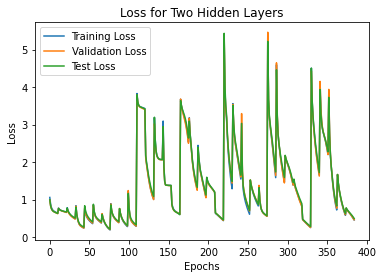

In [ ]:
plt.figure()
plt.title('Loss for Two Hidden Layers')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()

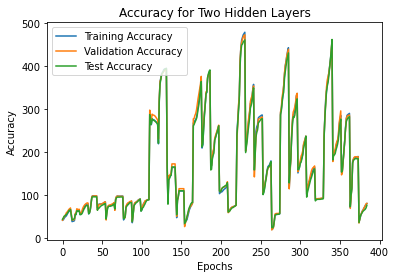

In [ ]:
plt.figure()
plt.title('Accuracy for Two Hidden Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()